In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from load_dataset import load_hand_written_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, make_scorer
from util.utils import learning_curve_with_cross_validation
from util.utils import perform_grid_search
from util.utils import best_model_test_set_metrics 
from sklearn.tree import plot_tree
# fix all random seeds
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

%load_ext autoreload
%autoreload 2

df = load_hand_written_digits()

# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=RANDOM_SEED, shuffle=True, stratify=df['target'])

# Preprocess the data for kNN classifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# 1. Decision Trees

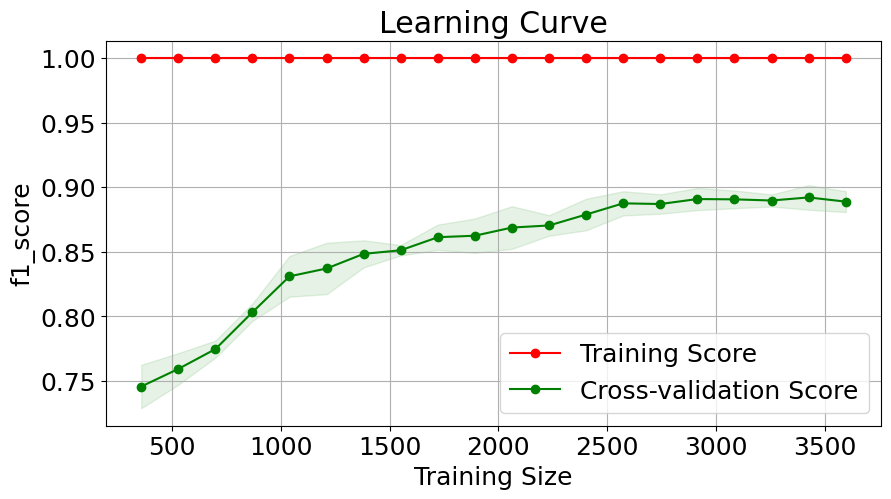

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from util.utils import learning_curve_with_cross_validation
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=RANDOM_SEED)

scorer = make_scorer(f1_score, average='weighted')

train_sizes = np.linspace(0.1, 1.0, 20)
learning_curve_with_cross_validation(tree_model, X_train, y_train, train_sizes, cv=5, scoring=scorer, dataset_name='digits')


In [5]:
# compute cross val score of the base model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=RANDOM_SEED, criterion='gini')

scorer = make_scorer(f1_score, average='weighted')

scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring=scorer)
scores.mean(), scores.std()

(0.8891361321121038, 0.009131980904867262)

19


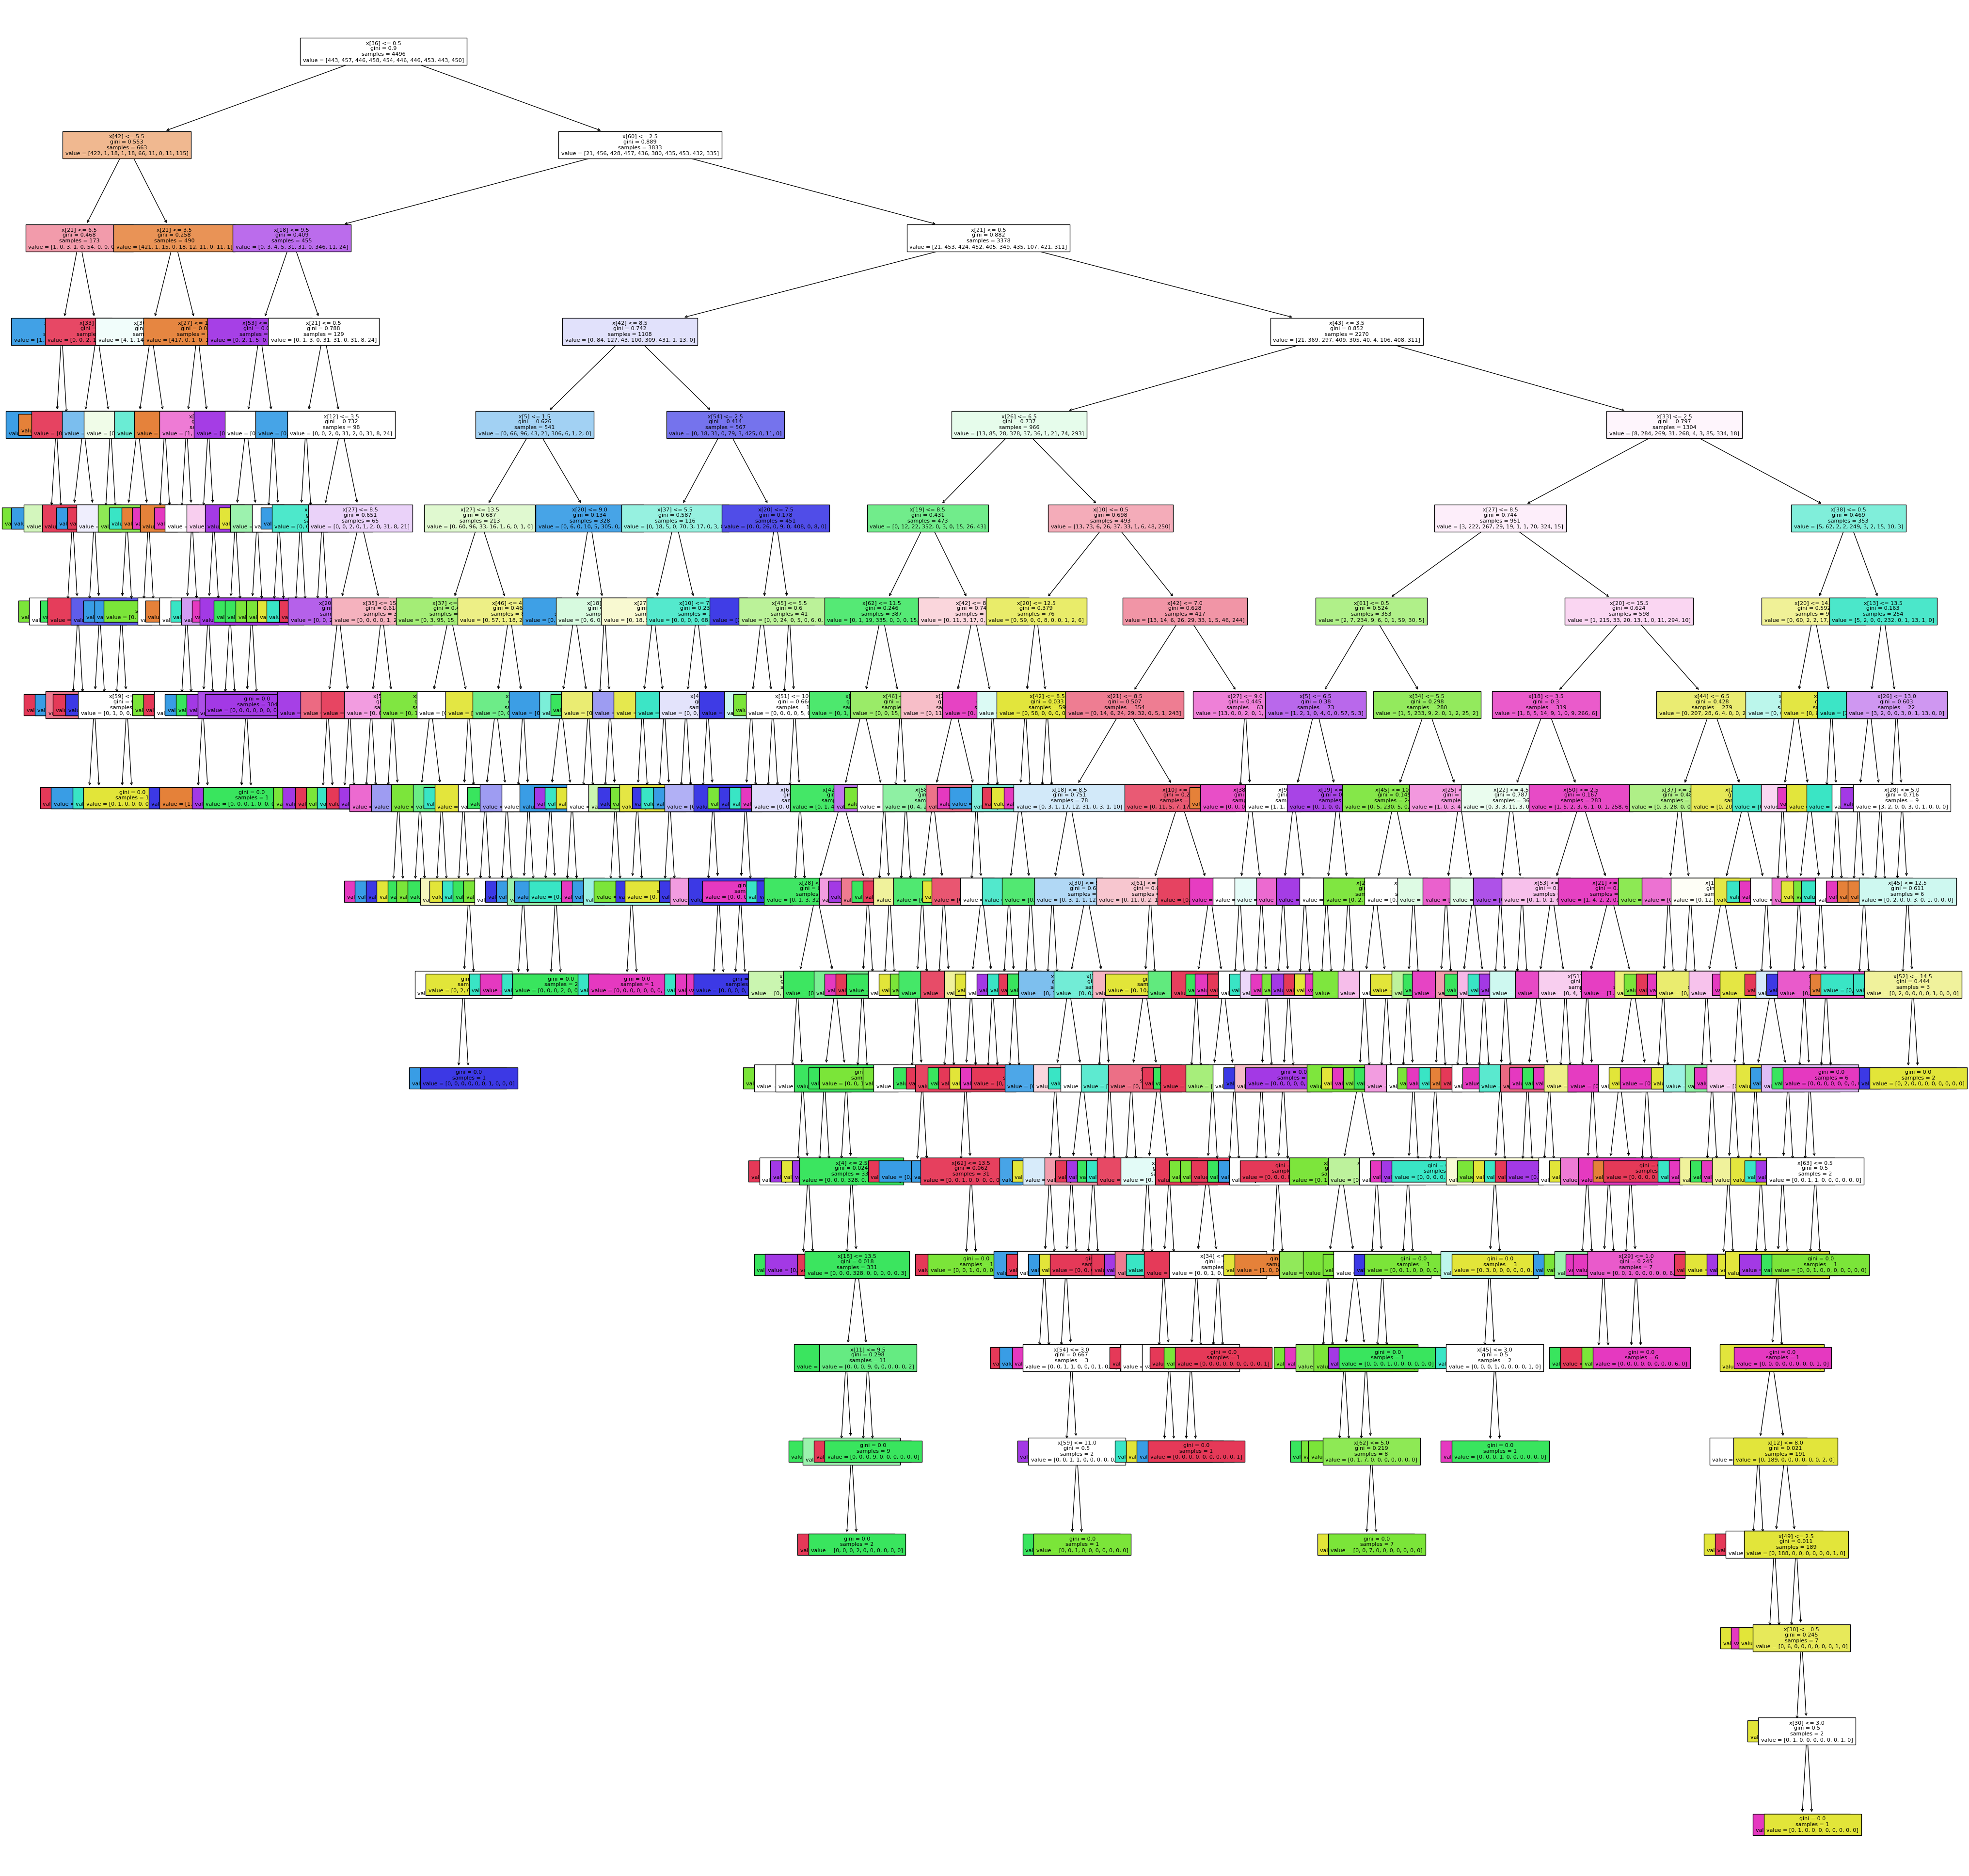

In [14]:
from sklearn.tree import plot_tree
# make a nice plot of the tree
plt.figure(figsize=(50, 50))
base_model = DecisionTreeClassifier(random_state=RANDOM_SEED)
base_model.fit(X_train, y_train)
print(base_model.get_depth())
_ = plot_tree(tree_model.fit(X_train, y_train), filled=True, fontsize=8)

In [10]:
# Evaluate the model on the test set
from sklearn.metrics import classification_report
import time 
base_model = DecisionTreeClassifier(random_state=RANDOM_SEED)
start = time.time()
base_model.fit(X_train, y_train)
end = time.time()
print(f"Training time: {(end - start) * 1000} ms")

start = time.time()
y_pred = base_model.predict(X_test)
end = time.time()
print(f"Inference time: {(end - start) * 1000} ms")
print(classification_report(y_test, y_pred))
# f1 score on the test set
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

Training time: 40.593624114990234 ms
Inference time: 1.8372535705566406 ms
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       111
           1       0.93      0.89      0.91       114
           2       0.85      0.94      0.89       111
           3       0.84      0.88      0.86       114
           4       0.90      0.90      0.90       114
           5       0.97      0.84      0.90       112
           6       0.93      0.96      0.95       112
           7       0.91      0.93      0.92       113
           8       0.84      0.88      0.86       111
           9       0.88      0.83      0.85       112

    accuracy                           0.90      1124
   macro avg       0.90      0.90      0.90      1124
weighted avg       0.90      0.90      0.90      1124



0.9021611499209455

### Now let's try to tune the hyperparameters

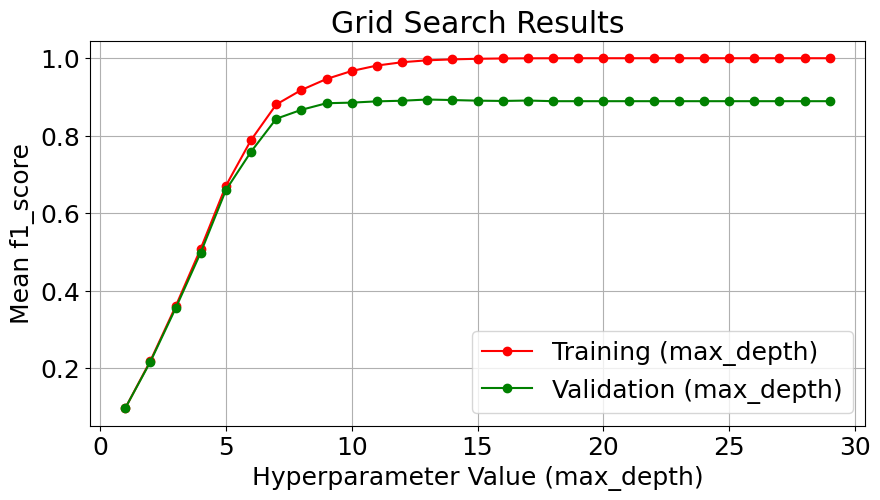

13


(0.893441156684391, 0.005519153890061312)

In [33]:
from util.utils import perform_grid_search

param_grid = {'max_depth': np.arange(1, 30)}
tree_model = DecisionTreeClassifier(random_state=RANDOM_SEED, criterion='gini')
best_tree_model = perform_grid_search(tree_model, X_train, y_train, param_grid, scoring=scorer, cv=5, dataset_name='digits')
print(best_tree_model.get_depth())

scores = cross_val_score(best_tree_model, X_train, y_train, cv=5, scoring=scorer)
scores.mean(), scores.std()


In [35]:
# Evaluate the model on the test set
from sklearn.metrics import classification_report

y_pred = best_tree_model.predict(X_test)
print(classification_report(y_test, y_pred))

# f1 score on the test set
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       111
           1       0.92      0.92      0.92       114
           2       0.90      0.93      0.92       111
           3       0.88      0.87      0.88       114
           4       0.91      0.94      0.93       114
           5       0.88      0.88      0.88       112
           6       0.96      0.96      0.96       112
           7       0.92      0.88      0.90       113
           8       0.81      0.84      0.82       111
           9       0.88      0.87      0.87       112

    accuracy                           0.90      1124
   macro avg       0.90      0.90      0.90      1124
weighted avg       0.90      0.90      0.90      1124



0.9031115355007586

In [3]:
# test on a new hyperparameter
param_grid = {'ccp_alpha': np.logspace(-4, -2, 20)}
tree_model = DecisionTreeClassifier(random_state=RANDOM_SEED, criterion='gini')
best_tree_model = perform_grid_search(tree_model, X_train, y_train, param_grid, scoring=scorer, cv=5, dataset_name='digits')
print(best_tree_model.ccp_alpha)
print(best_tree_model.get_depth())
scores = cross_val_score(best_tree_model, X_train, y_train, cv=5, scoring=scorer)
print(scores.mean(), scores.std())
_  = plot_tree(best_tree_model, filled=True, fontsize=8)

NameError: name 'scorer' is not defined

In [2]:
# Evaluate the model on the test set
from sklearn.metrics import classification_report

y_pred = best_tree_model.predict(X_test)
print(classification_report(y_test, y_pred))

# f1 score on the test set
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

NameError: name 'best_tree_model' is not defined

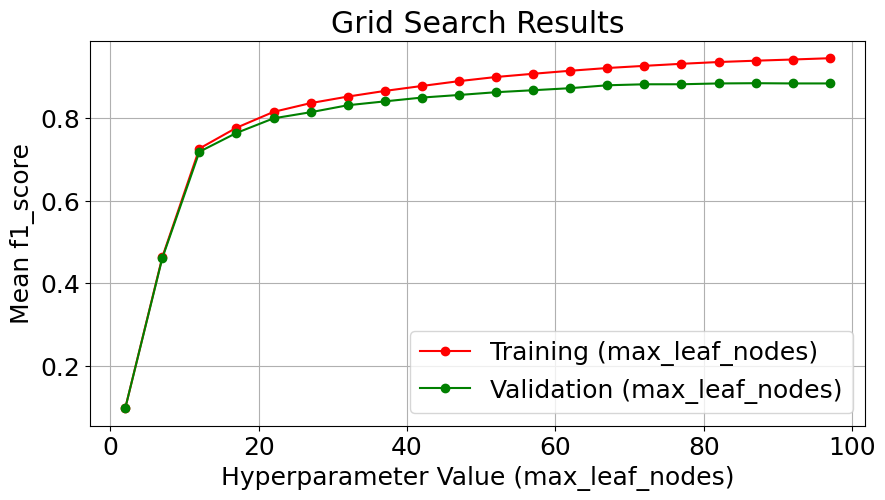

0.8841667944545322 0.007436179917370952


In [26]:
# test on a new hyperparameter
param_grid = {'max_leaf_nodes': np.arange(2, 100, 5)}
tree_model = DecisionTreeClassifier(random_state=RANDOM_SEED)
best_tree_model = perform_grid_search(tree_model, X_train, y_train, param_grid, scoring=scorer, cv=5)
# test on a new hyperparameter
scores = cross_val_score(best_tree_model, X_train, y_train, cv=5, scoring=scorer)
print(scores.mean(), scores.std())



In [37]:
# Evaluate the model on the test set
from sklearn.metrics import classification_report

y_pred = best_tree_model.predict(X_test)
print(classification_report(y_test, y_pred))

# f1 score on the test set
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       111
           1       0.92      0.92      0.92       114
           2       0.90      0.93      0.92       111
           3       0.88      0.87      0.88       114
           4       0.91      0.94      0.93       114
           5       0.88      0.88      0.88       112
           6       0.96      0.96      0.96       112
           7       0.92      0.88      0.90       113
           8       0.81      0.84      0.82       111
           9       0.88      0.87      0.87       112

    accuracy                           0.90      1124
   macro avg       0.90      0.90      0.90      1124
weighted avg       0.90      0.90      0.90      1124



0.9031115355007586

/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_paramet

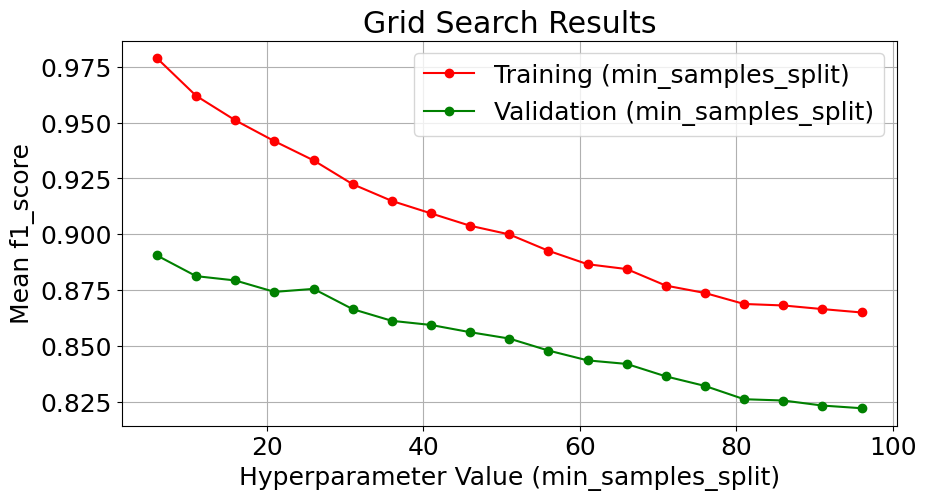

0.8904631905766196 0.00815867240093243


In [27]:
# test on a new hyperparameter
param_grid = {'min_samples_split': np.arange(1, 100, 5)}
tree_model = DecisionTreeClassifier(random_state=RANDOM_SEED)
best_tree_model = perform_grid_search(tree_model, X_train, y_train, param_grid, scoring=scorer, cv=5)
scores = cross_val_score(best_tree_model, X_train, y_train, cv=5, scoring=scorer)
print(scores.mean(), scores.std())

In [29]:
# scale the data
param_grid = {
            'max_depth': np.arange(1, 20),
            'min_samples_leaf': np.arange(1, 100, 10),
            'min_samples_split': np.arange(1, 100, 10),
            'max_features': np.arange(1, 16),
            }

tree_model = DecisionTreeClassifier(random_state=RANDOM_SEED, ccp_alpha=0.0006951927961775606)
best_tree_model = perform_grid_search(tree_model, X_train, y_train, param_grid, scoring=scorer, cv=5, show_plot=False)
scores = cross_val_score(best_tree_model, X_train, y_train, cv=5, scoring=scorer)
print(scores.mean(), scores.std())

/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
14250 fits failed out of a total of 142500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14250 fits failed with the following error:
Traceback (most recent call last):
  File "/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    valid

0.875050547705247 0.019377467713168003


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.01883979 0.01883979 ... 0.71945365 0.71945365 0.71945365]
  warnings.warn(
/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_search.py:976: UserWarning: One or more of the train scores are non-finite: [       nan 0.01916934 0.01916934 ... 0.73131097 0.73131097 0.73131097]
  warnings.warn(


In [21]:
best_tree_model

DecisionTreeClassifier(ccp_alpha=0.0006951927961775606, max_features=15,
                       min_samples_split=11, random_state=42)

# 2. Neural networks

In [12]:
from sklearn.neural_network import MLPClassifier
from util.utils import learning_curve_with_cross_validation
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, average='weighted')

base_model = MLPClassifier(random_state=RANDOM_SEED, max_iter=1000)

# train_sizes = np.linspace(0.1, 1.0, 20)
# learning_curve_with_cross_validation(base_model, X_train_scaled, y_train, train_sizes, cv=5, scoring=scorer, dataset_name='digits')

100%|██████████| 20/20 [00:00<00:00, 29.63it/s]


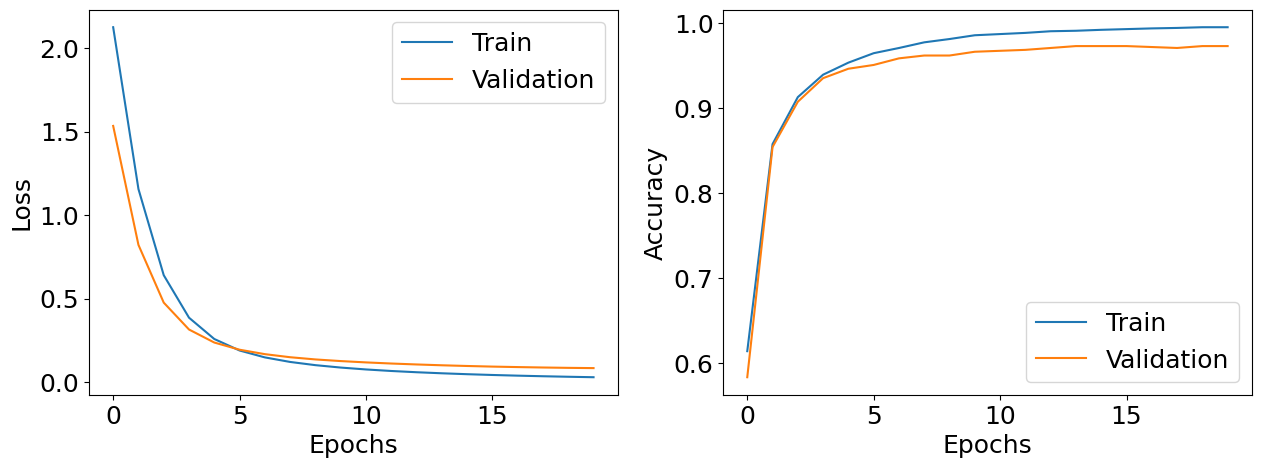

In [13]:
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Split your training data into a smaller training set and a validation set
X_train_small, X_val, y_train_small, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=RANDOM_SEED)

# Initialize the MLPClassifier
mlp_model = MLPClassifier(random_state=RANDOM_SEED, max_iter=1, warm_start=True)

train_loss = []
val_loss = []
train_acc = []
val_acc = []

# Manually create the epochs loop
for _ in tqdm(range(20)):
    mlp_model.fit(X_train_small, y_train_small)
    
    # Get the loss on the training set
    train_loss.append(mlp_model.loss_)
    
    # Get the predictions on the validation set
    y_val_pred = mlp_model.predict_proba(X_val)
    
    # Calculate the loss on the validation set
    val_loss.append(log_loss(y_val, y_val_pred))

    # Get the training accuracy
    y_train_pred = mlp_model.predict(X_train_small)
    train_acc.append(accuracy_score(y_train_small, y_train_pred))

    # Get the validation accuracy
    y_val_pred = mlp_model.predict(X_val)
    val_acc.append(accuracy_score(y_val, y_val_pred))

# Plot the training and validation loss curves as well as the training and validation accuracies using subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(train_loss)
axes[0].plot(val_loss)
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend(['Train', 'Validation'])

axes[1].plot(train_acc)
axes[1].plot(val_acc)
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend(['Train', 'Validation'])


In [14]:

mlp_model = MLPClassifier(random_state=RANDOM_SEED, max_iter=1000)
start = time.time()
mlp_model.fit(X_train_scaled, y_train)
end = time.time()
print(f"Training time: {(end - start) * 1000} ms")
# print crossval scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp_model, X_train_scaled, y_train, cv=5, scoring=scorer)
print(scores.mean(), scores.std())

Training time: 2421.071767807007 ms
0.9835694351708627 0.0045535200552261415


In [16]:
start = time.time()
y_pred = mlp_model.predict(X_test_scaled)
end = time.time()
print(f"Inference time: {(end - start) * 1000} ms")

Inference time: 7.414102554321289 ms


### Now let's try to tune the hyperparameters

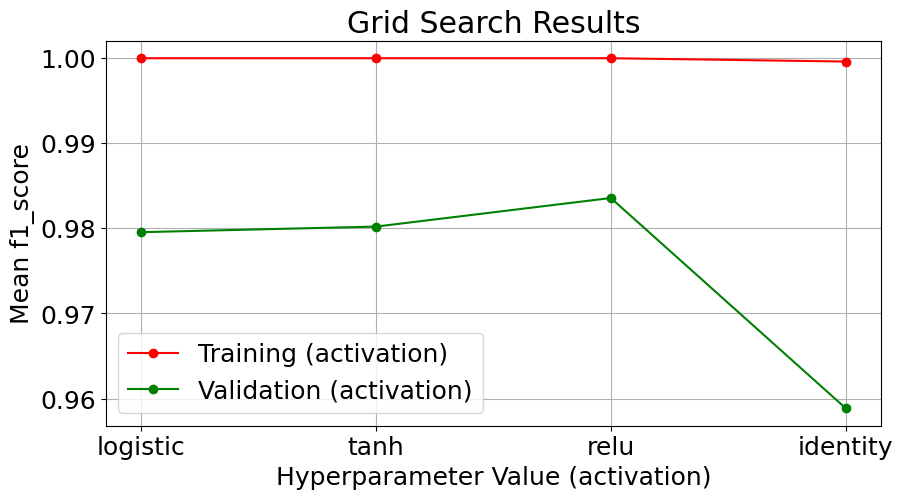

0.9835694351708627 0.0045535200552261415


In [15]:
from util.utils import perform_grid_search

param_grid = {'activation': ['logistic', 'tanh', 'relu', 'identity']}
mlp_model = MLPClassifier(random_state=RANDOM_SEED, max_iter=1000)
best_mlp_model = perform_grid_search(mlp_model, X_train_scaled, y_train, param_grid, scoring=scorer, cv=5, dataset_name='digits')
scores = cross_val_score(best_mlp_model, X_train_scaled, y_train, cv=5, scoring=scorer, n_jobs=-1)
print(scores.mean(), scores.std())

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[CV 1/5; 1/5] START learning_rate_init=0.0001...................................
[CV 2/5; 1/5] START learning_rate_init=0.0001...................................
[CV 4/5; 1/5] START learning_rate_init=0.0001...................................
[CV 5/5; 1/5] START learning_rate_init=0.0001...................................
[CV 3/5; 1/5] START learning_rate_init=0.0001...................................
[CV 1/5; 2/5] START learning_rate_init=0.001....................................
[CV 2/5; 2/5] START learning_rate_init=0.001....................................
[CV 3/5; 2/5] START learning_rate_init=0.001....................................
[CV 1/5; 2/5] END learning_rate_init=0.001;, score=(train=1.000, test=0.981) total time=   2.0s
[CV 4/5; 2/5] START learning_rate_init=0.001....................................
[CV 2/5; 2/5] END learning_rate_init=0.001;, score=(train=1.000, test=0.983) total time=   2.1s
[CV 5/5; 2/5] START learning_rate_init=0.001...................................

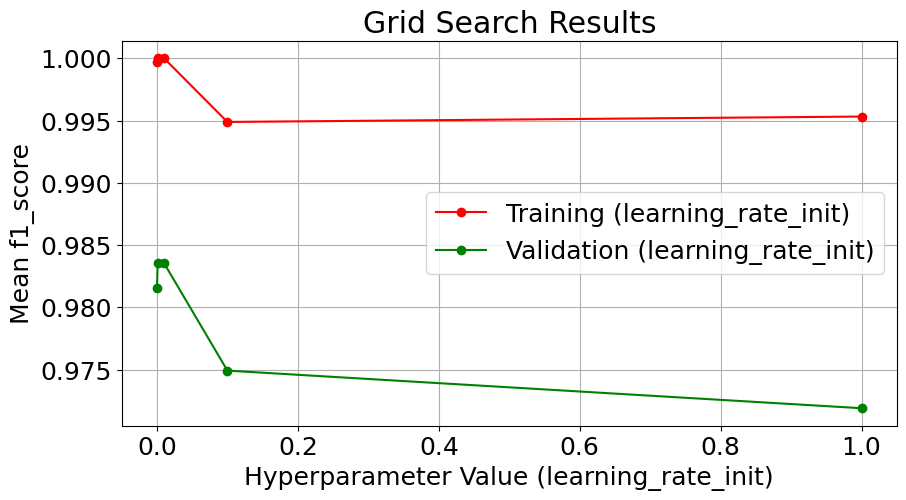

In [35]:
from util.utils import perform_grid_search

param_grid = {
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1.0],
}

nn_model = MLPClassifier(random_state=RANDOM_SEED, max_iter=2000, learning_rate='adaptive')

best_nn_model = perform_grid_search(nn_model, X_train_scaled, y_train, param_grid, scoring=scorer, cv=5, show_plot=True, verbose=10, dataset_name='digits')

In [44]:
nn_model = MLPClassifier(random_state=RANDOM_SEED, max_iter=2000, learning_rate_init=1)
scores = cross_val_score(nn_model, X_train_scaled, y_train, cv=5, scoring=scorer, n_jobs=-1)
print(scores.mean(), scores.std())

0.9719033440811622 0.004134483191335237


In [46]:
# Train model on the whole training set and evaluate on the test set
from sklearn.metrics import classification_report
best_nn_model = MLPClassifier(random_state=RANDOM_SEED, max_iter=2000, learning_rate_init=0.001, activation='relu', learning_rate='adaptive', hidden_layer_sizes=(100))
best_nn_model.fit(X_train_scaled, y_train)
y_pred = best_nn_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# f1 score on the test set
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       0.99      0.98      0.99       114
           2       0.99      0.99      0.99       111
           3       0.99      0.99      0.99       114
           4       0.99      0.99      0.99       114
           5       0.98      0.97      0.98       112
           6       0.99      0.99      0.99       112
           7       0.98      0.99      0.99       113
           8       0.97      0.98      0.98       111
           9       0.98      0.98      0.98       112

    accuracy                           0.99      1124
   macro avg       0.99      0.99      0.99      1124
weighted avg       0.99      0.99      0.99      1124



0.9875444839857651

# 3. Boosted Decision Trees

### 3.1 Gradient Boosting

In [17]:
# Let's begin with deicison trees boosting using BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

base_model = GradientBoostingClassifier(random_state=RANDOM_SEED, n_estimators=100)
scorer = make_scorer(f1_score, average='weighted')

train_sizes = np.linspace(0.1, 1.0, 10)
learning_curve_with_cross_validation(base_model, X_train_scaled, y_train, train_sizes, cv=5, scoring=scorer)
# get cross val score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(base_model, X_train_scaled, y_train, cv=5, scoring=scorer)

In [28]:
print(scores.mean(), scores.std())

0.9733882186908988 0.007335160583620361


### 3.2 Adaboost

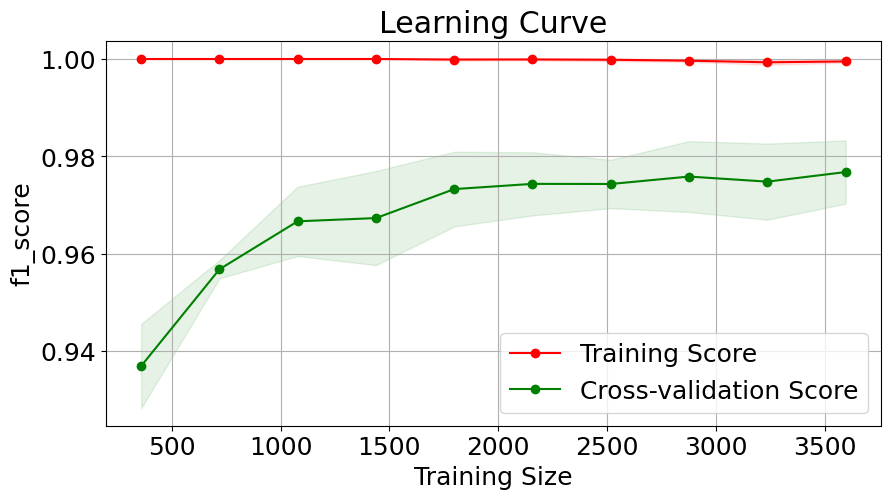

In [44]:
# Let's begin with deicison trees boosting using BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

base_estimator = DecisionTreeClassifier(random_state=RANDOM_SEED, max_depth=5, criterion='entropy')
base_model = AdaBoostClassifier(random_state=RANDOM_SEED, estimator=base_estimator, n_estimators=100)
scorer = make_scorer(f1_score, average='weighted')

train_sizes = np.linspace(0.1, 1.0, 10)
learning_curve_with_cross_validation(base_model, X_train_scaled, y_train, train_sizes, cv=5, scoring=scorer, dataset_name='digits')

In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(base_model, X_train_scaled, y_train, cv=5, scoring=scorer)
print(scores.mean(), scores.std())

KeyboardInterrupt: 

In [19]:
start = time.time()
base_model.fit(X_train_scaled, y_train)
end = time.time()
print(f"Training time: {(end - start) * 1000} ms")
start = time.time()
y_pred = base_model.predict(X_test_scaled)
end = time.time()
print(f"Inference time: {(end - start) * 1000} ms")
print(classification_report(y_test, y_pred))

# f1 score on the test set
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

Training time: 11049.224138259888 ms
Inference time: 14.345169067382812 ms
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       111
           1       0.99      0.99      0.99       114
           2       0.99      0.99      0.99       111
           3       0.98      0.96      0.97       114
           4       0.96      0.98      0.97       114
           5       0.97      0.96      0.97       112
           6       0.99      0.98      0.99       112
           7       0.98      0.97      0.98       113
           8       0.95      0.98      0.96       111
           9       0.95      0.95      0.95       112

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



0.9760205327297149

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5; 1/49] START n_estimators=10............................................
[CV 2/5; 1/49] START n_estimators=10............................................
[CV 3/5; 1/49] START n_estimators=10............................................
[CV 4/5; 1/49] START n_estimators=10............................................
[CV 5/5; 1/49] START n_estimators=10............................................
[CV 1/5; 2/49] START n_estimators=20............................................
[CV 2/5; 2/49] START n_estimators=20............................................
[CV 3/5; 2/49] START n_estimators=20............................................
[CV 5/5; 1/49] END n_estimators=10;, score=(train=0.976, test=0.924) total time=   0.3s
[CV 1/5; 1/49] END n_estimators=10;, score=(train=0.974, test=0.927) total time=   0.3s
[CV 4/5; 2/49] START n_estimators=20............................................
[CV 5/5; 2/49] START n_estimators

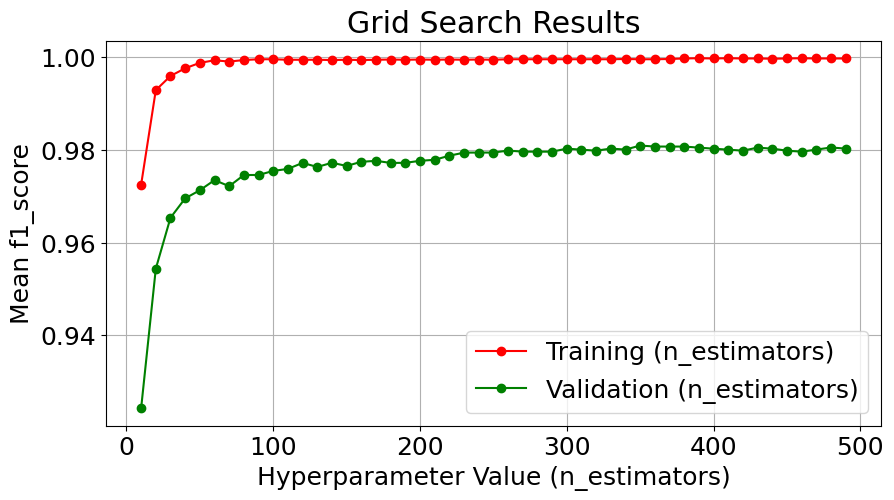

In [33]:
# hyperparam search on n_estimators
from util.utils import perform_grid_search

param_grid = {'n_estimators': np.arange(10, 500, 10)}

base_estimator = DecisionTreeClassifier(random_state=RANDOM_SEED, max_depth=5, criterion='entropy')
base_model = AdaBoostClassifier(random_state=RANDOM_SEED, estimator=base_estimator)
best_base_model = perform_grid_search(base_model, X_train_scaled, y_train, param_grid, scoring=scorer, cv=5, dataset_name='digits', verbose=10)

In [34]:
best_base_model.n_estimators

350

In [35]:
# cross val score on best model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_base_model, X_train_scaled, y_train, cv=5, scoring=scorer)
print(scores.mean(), scores.std())

0.9809369967621574 0.0052972630495001964


In [36]:
best_base_model.fit(X_train_scaled, y_train)
y_pred = best_base_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# f1 score on the test set
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       111
           1       0.99      1.00      1.00       114
           2       1.00      0.98      0.99       111
           3       0.98      1.00      0.99       114
           4       0.98      0.97      0.98       114
           5       0.99      0.94      0.96       112
           6       0.99      0.98      0.99       112
           7       0.97      0.98      0.98       113
           8       0.94      1.00      0.97       111
           9       0.94      0.96      0.95       112

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



0.9786694895446342

#### Impact of the max_depth of the base estimator

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[CV 5/5; 1/20] START base_estimator__ccp_alpha=9.999999999999999e-05............[CV 3/5; 2/20] START base_estimator__ccp_alpha=0.00012742749857031334...........
[CV 2/5; 2/20] START base_estimator__ccp_alpha=0.00012742749857031334...........
[CV 1/5; 2/20] START base_estimator__ccp_alpha=0.00012742749857031334...........
[CV 1/5; 1/20] START base_estimator__ccp_alpha=9.999999999999999e-05............

[CV 3/5; 1/20] START base_estimator__ccp_alpha=9.999999999999999e-05............
[CV 4/5; 1/20] START base_estimator__ccp_alpha=9.999999999999999e-05............
[CV 2/5; 1/20] START base_estimator__ccp_alpha=9.999999999999999e-05............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/home/romain/anaconda3/envs/ML/lib/python3.11/site-p

[CV 1/5; 1/20] END base_estimator__ccp_alpha=9.999999999999999e-05;, score=(train=0.999, test=0.980) total time=  21.0s
[CV 3/5; 2/20] END base_estimator__ccp_alpha=0.00012742749857031334;, score=(train=0.999, test=0.986) total time=  20.9s
[CV 4/5; 2/20] START base_estimator__ccp_alpha=0.00012742749857031334...........
[CV 5/5; 2/20] START base_estimator__ccp_alpha=0.00012742749857031334...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 2/5; 2/20] END base_estimator__ccp_alpha=0.00012742749857031334;, score=(train=0.999, test=0.971) total time=  21.9s
[CV 1/5; 3/20] START base_estimator__ccp_alpha=0.00016237767391887208...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 4/5; 1/20] END base_estimator__ccp_alpha=9.999999999999999e-05;, score=(train=0.999, test=0.979) total time=  22.2s
[CV 2/5; 3/20] START base_estimator__ccp_alpha=0.00016237767391887208...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 1/5; 2/20] END base_estimator__ccp_alpha=0.00012742749857031334;, score=(train=0.999, test=0.979) total time=  22.9s
[CV 3/5; 3/20] START base_estimator__ccp_alpha=0.00016237767391887208...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 2/5; 1/20] END base_estimator__ccp_alpha=9.999999999999999e-05;, score=(train=0.999, test=0.972) total time=  23.2s
[CV 4/5; 3/20] START base_estimator__ccp_alpha=0.00016237767391887208...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 3/5; 1/20] END base_estimator__ccp_alpha=9.999999999999999e-05;, score=(train=1.000, test=0.987) total time=  24.0s
[CV 5/5; 3/20] START base_estimator__ccp_alpha=0.00016237767391887208...........
[CV 5/5; 1/20] END base_estimator__ccp_alpha=9.999999999999999e-05;, score=(train=0.999, test=0.973) total time=  23.7s
[CV 1/5; 4/20] START base_estimator__ccp_alpha=0.000206913808111479.............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 5/5; 2/20] END base_estimator__ccp_alpha=0.00012742749857031334;, score=(train=0.999, test=0.971) total time=  22.8s
[CV 2/5; 4/20] START base_estimator__ccp_alpha=0.000206913808111479.............
[CV 1/5; 3/20] END base_estimator__ccp_alpha=0.00016237767391887208;, score=(train=0.999, test=0.981) total time=  21.8s
[CV 3/5; 4/20] START base_estimator__ccp_alpha=0.000206913808111479.............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 2/5; 3/20] END base_estimator__ccp_alpha=0.00016237767391887208;, score=(train=0.999, test=0.973) total time=  21.4s
[CV 4/5; 4/20] START base_estimator__ccp_alpha=0.000206913808111479.............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 4/5; 2/20] END base_estimator__ccp_alpha=0.00012742749857031334;, score=(train=0.999, test=0.983) total time=  23.4s
[CV 5/5; 4/20] START base_estimator__ccp_alpha=0.000206913808111479.............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 4/5; 3/20] END base_estimator__ccp_alpha=0.00016237767391887208;, score=(train=0.999, test=0.981) total time=  21.8s
[CV 1/5; 5/20] START base_estimator__ccp_alpha=0.0002636650898730358............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 1/5; 4/20] END base_estimator__ccp_alpha=0.000206913808111479;, score=(train=0.999, test=0.981) total time=  21.9s
[CV 2/5; 5/20] START base_estimator__ccp_alpha=0.0002636650898730358............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 5/5; 3/20] END base_estimator__ccp_alpha=0.00016237767391887208;, score=(train=1.000, test=0.971) total time=  22.0s
[CV 3/5; 5/20] START base_estimator__ccp_alpha=0.0002636650898730358............
[CV 3/5; 3/20] END base_estimator__ccp_alpha=0.00016237767391887208;, score=(train=1.000, test=0.982) total time=  23.3s
[CV 4/5; 5/20] START base_estimator__ccp_alpha=0.0002636650898730358............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 5/5; 4/20] END base_estimator__ccp_alpha=0.000206913808111479;, score=(train=0.999, test=0.970) total time=  21.5s
[CV 5/5; 5/20] START base_estimator__ccp_alpha=0.0002636650898730358............
[CV 4/5; 4/20] END base_estimator__ccp_alpha=0.000206913808111479;, score=(train=0.999, test=0.981) total time=  22.0s
[CV 1/5; 6/20] START base_estimator__ccp_alpha=0.0003359818286283781............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 1/5; 5/20] END base_estimator__ccp_alpha=0.0002636650898730358;, score=(train=0.999, test=0.983) total time=  20.7s
[CV 2/5; 6/20] START base_estimator__ccp_alpha=0.0003359818286283781............
[CV 2/5; 4/20] END base_estimator__ccp_alpha=0.000206913808111479;, score=(train=0.999, test=0.970) total time=  22.5s
[CV 3/5; 6/20] START base_estimator__ccp_alpha=0.0003359818286283781............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 3/5; 4/20] END base_estimator__ccp_alpha=0.000206913808111479;, score=(train=0.999, test=0.987) total time=  22.8s
[CV 4/5; 6/20] START base_estimator__ccp_alpha=0.0003359818286283781............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 2/5; 5/20] END base_estimator__ccp_alpha=0.0002636650898730358;, score=(train=0.999, test=0.971) total time=  21.4s
[CV 5/5; 6/20] START base_estimator__ccp_alpha=0.0003359818286283781............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 3/5; 5/20] END base_estimator__ccp_alpha=0.0002636650898730358;, score=(train=0.999, test=0.987) total time=  22.5s
[CV 1/5; 7/20] START base_estimator__ccp_alpha=0.00042813323987193956...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 4/5; 5/20] END base_estimator__ccp_alpha=0.0002636650898730358;, score=(train=0.999, test=0.981) total time=  22.9s
[CV 2/5; 7/20] START base_estimator__ccp_alpha=0.00042813323987193956...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 5/5; 5/20] END base_estimator__ccp_alpha=0.0002636650898730358;, score=(train=1.000, test=0.969) total time=  23.2s
[CV 3/5; 7/20] START base_estimator__ccp_alpha=0.00042813323987193956...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 2/5; 6/20] END base_estimator__ccp_alpha=0.0003359818286283781;, score=(train=0.999, test=0.972) total time=  22.7s
[CV 4/5; 7/20] START base_estimator__ccp_alpha=0.00042813323987193956...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 1/5; 6/20] END base_estimator__ccp_alpha=0.0003359818286283781;, score=(train=0.999, test=0.980) total time=  23.8s
[CV 5/5; 7/20] START base_estimator__ccp_alpha=0.00042813323987193956...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 3/5; 6/20] END base_estimator__ccp_alpha=0.0003359818286283781;, score=(train=0.999, test=0.983) total time=  23.9s
[CV 1/5; 8/20] START base_estimator__ccp_alpha=0.000545559478116852.............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 4/5; 6/20] END base_estimator__ccp_alpha=0.0003359818286283781;, score=(train=0.998, test=0.983) total time=  23.8s
[CV 2/5; 8/20] START base_estimator__ccp_alpha=0.000545559478116852.............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 5/5; 6/20] END base_estimator__ccp_alpha=0.0003359818286283781;, score=(train=0.999, test=0.971) total time=  24.4s
[CV 3/5; 8/20] START base_estimator__ccp_alpha=0.000545559478116852.............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 2/5; 7/20] END base_estimator__ccp_alpha=0.00042813323987193956;, score=(train=0.999, test=0.973) total time=  22.9s
[CV 4/5; 8/20] START base_estimator__ccp_alpha=0.000545559478116852.............
[CV 1/5; 7/20] END base_estimator__ccp_alpha=0.00042813323987193956;, score=(train=0.999, test=0.979) total time=  23.5s
[CV 5/5; 8/20] START base_estimator__ccp_alpha=0.000545559478116852.............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 3/5; 7/20] END base_estimator__ccp_alpha=0.00042813323987193956;, score=(train=0.999, test=0.986) total time=  19.6s
[CV 1/5; 9/20] START base_estimator__ccp_alpha=0.0006951927961775606............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 4/5; 7/20] END base_estimator__ccp_alpha=0.00042813323987193956;, score=(train=0.999, test=0.982) total time=  20.6s
[CV 2/5; 9/20] START base_estimator__ccp_alpha=0.0006951927961775606............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 1/5; 8/20] END base_estimator__ccp_alpha=0.000545559478116852;, score=(train=0.999, test=0.977) total time=  19.9s
[CV 3/5; 9/20] START base_estimator__ccp_alpha=0.0006951927961775606............
[CV 5/5; 7/20] END base_estimator__ccp_alpha=0.00042813323987193956;, score=(train=0.999, test=0.968) total time=  20.3s
[CV 4/5; 9/20] START base_estimator__ccp_alpha=0.0006951927961775606............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 2/5; 8/20] END base_estimator__ccp_alpha=0.000545559478116852;, score=(train=0.999, test=0.969) total time=  20.2s
[CV 5/5; 9/20] START base_estimator__ccp_alpha=0.0006951927961775606............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 4/5; 8/20] END base_estimator__ccp_alpha=0.000545559478116852;, score=(train=0.998, test=0.980) total time=  19.3s
[CV 1/5; 10/20] START base_estimator__ccp_alpha=0.0008858667904100822...........
[CV 3/5; 8/20] END base_estimator__ccp_alpha=0.000545559478116852;, score=(train=1.000, test=0.988) total time=  19.9s
[CV 2/5; 10/20] START base_estimator__ccp_alpha=0.0008858667904100822...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 5/5; 8/20] END base_estimator__ccp_alpha=0.000545559478116852;, score=(train=0.999, test=0.971) total time=  21.0s
[CV 3/5; 10/20] START base_estimator__ccp_alpha=0.0008858667904100822...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 1/5; 9/20] END base_estimator__ccp_alpha=0.0006951927961775606;, score=(train=0.999, test=0.983) total time=  22.3s
[CV 4/5; 10/20] START base_estimator__ccp_alpha=0.0008858667904100822...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 3/5; 9/20] END base_estimator__ccp_alpha=0.0006951927961775606;, score=(train=0.999, test=0.989) total time=  21.3s
[CV 5/5; 10/20] START base_estimator__ccp_alpha=0.0008858667904100822...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 4/5; 9/20] END base_estimator__ccp_alpha=0.0006951927961775606;, score=(train=0.999, test=0.981) total time=  21.5s
[CV 1/5; 11/20] START base_estimator__ccp_alpha=0.0011288378916846883...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 2/5; 9/20] END base_estimator__ccp_alpha=0.0006951927961775606;, score=(train=0.999, test=0.973) total time=  22.6s
[CV 2/5; 11/20] START base_estimator__ccp_alpha=0.0011288378916846883...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 5/5; 9/20] END base_estimator__ccp_alpha=0.0006951927961775606;, score=(train=0.999, test=0.973) total time=  22.3s
[CV 3/5; 11/20] START base_estimator__ccp_alpha=0.0011288378916846883...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 2/5; 10/20] END base_estimator__ccp_alpha=0.0008858667904100822;, score=(train=0.999, test=0.976) total time=  21.7s
[CV 4/5; 11/20] START base_estimator__ccp_alpha=0.0011288378916846883...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 1/5; 10/20] END base_estimator__ccp_alpha=0.0008858667904100822;, score=(train=0.999, test=0.979) total time=  23.3s
[CV 5/5; 11/20] START base_estimator__ccp_alpha=0.0011288378916846883...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 3/5; 10/20] END base_estimator__ccp_alpha=0.0008858667904100822;, score=(train=0.999, test=0.984) total time=  22.2s
[CV 1/5; 12/20] START base_estimator__ccp_alpha=0.001438449888287663............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 4/5; 10/20] END base_estimator__ccp_alpha=0.0008858667904100822;, score=(train=0.999, test=0.982) total time=  21.8s
[CV 2/5; 12/20] START base_estimator__ccp_alpha=0.001438449888287663............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 5/5; 10/20] END base_estimator__ccp_alpha=0.0008858667904100822;, score=(train=0.999, test=0.970) total time=  20.9s
[CV 3/5; 12/20] START base_estimator__ccp_alpha=0.001438449888287663............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 1/5; 11/20] END base_estimator__ccp_alpha=0.0011288378916846883;, score=(train=0.999, test=0.977) total time=  21.4s
[CV 4/5; 12/20] START base_estimator__ccp_alpha=0.001438449888287663............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 2/5; 11/20] END base_estimator__ccp_alpha=0.0011288378916846883;, score=(train=0.999, test=0.964) total time=  21.1s
[CV 5/5; 12/20] START base_estimator__ccp_alpha=0.001438449888287663............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 3/5; 11/20] END base_estimator__ccp_alpha=0.0011288378916846883;, score=(train=0.999, test=0.983) total time=  21.5s
[CV 1/5; 13/20] START base_estimator__ccp_alpha=0.0018329807108324356...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 5/5; 11/20] END base_estimator__ccp_alpha=0.0011288378916846883;, score=(train=0.999, test=0.971) total time=  20.7s
[CV 2/5; 13/20] START base_estimator__ccp_alpha=0.0018329807108324356...........
[CV 4/5; 11/20] END base_estimator__ccp_alpha=0.0011288378916846883;, score=(train=0.999, test=0.981) total time=  22.1s


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 3/5; 13/20] START base_estimator__ccp_alpha=0.0018329807108324356...........
[CV 1/5; 12/20] END base_estimator__ccp_alpha=0.001438449888287663;, score=(train=0.998, test=0.978) total time=  20.3s
[CV 4/5; 13/20] START base_estimator__ccp_alpha=0.0018329807108324356...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 3/5; 12/20] END base_estimator__ccp_alpha=0.001438449888287663;, score=(train=0.999, test=0.983) total time=  19.3s
[CV 5/5; 13/20] START base_estimator__ccp_alpha=0.0018329807108324356...........


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 4/5; 12/20] END base_estimator__ccp_alpha=0.001438449888287663;, score=(train=0.998, test=0.979) total time=  18.8s
[CV 1/5; 14/20] START base_estimator__ccp_alpha=0.002335721469090121............
[CV 2/5; 12/20] END base_estimator__ccp_alpha=0.001438449888287663;, score=(train=0.999, test=0.969) total time=  20.6s
[CV 2/5; 14/20] START base_estimator__ccp_alpha=0.002335721469090121............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 5/5; 12/20] END base_estimator__ccp_alpha=0.001438449888287663;, score=(train=0.999, test=0.970) total time=  20.0s
[CV 3/5; 14/20] START base_estimator__ccp_alpha=0.002335721469090121............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 1/5; 13/20] END base_estimator__ccp_alpha=0.0018329807108324356;, score=(train=0.999, test=0.979) total time=  19.8s
[CV 4/5; 14/20] START base_estimator__ccp_alpha=0.002335721469090121............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 2/5; 13/20] END base_estimator__ccp_alpha=0.0018329807108324356;, score=(train=0.999, test=0.971) total time=  19.3s
[CV 5/5; 14/20] START base_estimator__ccp_alpha=0.002335721469090121............
[CV 3/5; 13/20] END base_estimator__ccp_alpha=0.0018329807108324356;, score=(train=0.999, test=0.983) total time=  20.0s
[CV 1/5; 15/20] START base_estimator__ccp_alpha=0.002976351441631319............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 4/5; 13/20] END base_estimator__ccp_alpha=0.0018329807108324356;, score=(train=0.999, test=0.979) total time=  20.0s
[CV 2/5; 15/20] START base_estimator__ccp_alpha=0.002976351441631319............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 5/5; 13/20] END base_estimator__ccp_alpha=0.0018329807108324356;, score=(train=0.998, test=0.969) total time=  19.5s
[CV 3/5; 15/20] START base_estimator__ccp_alpha=0.002976351441631319............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 2/5; 14/20] END base_estimator__ccp_alpha=0.002335721469090121;, score=(train=0.999, test=0.971) total time=  19.5s
[CV 4/5; 15/20] START base_estimator__ccp_alpha=0.002976351441631319............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 1/5; 14/20] END base_estimator__ccp_alpha=0.002335721469090121;, score=(train=0.999, test=0.975) total time=  20.2s
[CV 5/5; 15/20] START base_estimator__ccp_alpha=0.002976351441631319............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 3/5; 14/20] END base_estimator__ccp_alpha=0.002335721469090121;, score=(train=0.999, test=0.984) total time=  18.8s
[CV 1/5; 16/20] START base_estimator__ccp_alpha=0.00379269019073225.............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 4/5; 14/20] END base_estimator__ccp_alpha=0.002335721469090121;, score=(train=0.998, test=0.978) total time=  19.4s
[CV 2/5; 16/20] START base_estimator__ccp_alpha=0.00379269019073225.............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 5/5; 14/20] END base_estimator__ccp_alpha=0.002335721469090121;, score=(train=0.999, test=0.969) total time=  20.1s
[CV 3/5; 16/20] START base_estimator__ccp_alpha=0.00379269019073225.............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 1/5; 15/20] END base_estimator__ccp_alpha=0.002976351441631319;, score=(train=0.999, test=0.974) total time=  19.7s
[CV 4/5; 16/20] START base_estimator__ccp_alpha=0.00379269019073225.............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 2/5; 15/20] END base_estimator__ccp_alpha=0.002976351441631319;, score=(train=0.999, test=0.969) total time=  19.8s
[CV 5/5; 16/20] START base_estimator__ccp_alpha=0.00379269019073225.............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 3/5; 15/20] END base_estimator__ccp_alpha=0.002976351441631319;, score=(train=0.999, test=0.982) total time=  19.8s
[CV 1/5; 17/20] START base_estimator__ccp_alpha=0.004832930238571752............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 1/5; 16/20] END base_estimator__ccp_alpha=0.00379269019073225;, score=(train=0.999, test=0.980) total time=  19.7s
[CV 2/5; 17/20] START base_estimator__ccp_alpha=0.004832930238571752............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 5/5; 15/20] END base_estimator__ccp_alpha=0.002976351441631319;, score=(train=0.999, test=0.972) total time=  20.3s
[CV 3/5; 17/20] START base_estimator__ccp_alpha=0.004832930238571752............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 4/5; 15/20] END base_estimator__ccp_alpha=0.002976351441631319;, score=(train=0.999, test=0.979) total time=  21.4s
[CV 4/5; 17/20] START base_estimator__ccp_alpha=0.004832930238571752............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 2/5; 16/20] END base_estimator__ccp_alpha=0.00379269019073225;, score=(train=0.999, test=0.969) total time=  21.0s
[CV 5/5; 17/20] START base_estimator__ccp_alpha=0.004832930238571752............
[CV 3/5; 16/20] END base_estimator__ccp_alpha=0.00379269019073225;, score=(train=0.998, test=0.985) total time=  20.0s
[CV 1/5; 18/20] START base_estimator__ccp_alpha=0.00615848211066026.............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 4/5; 16/20] END base_estimator__ccp_alpha=0.00379269019073225;, score=(train=0.998, test=0.976) total time=  20.8s
[CV 2/5; 18/20] START base_estimator__ccp_alpha=0.00615848211066026.............
[CV 5/5; 16/20] END base_estimator__ccp_alpha=0.00379269019073225;, score=(train=0.999, test=0.971) total time=  20.6s
[CV 3/5; 18/20] START base_estimator__ccp_alpha=0.00615848211066026.............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 1/5; 17/20] END base_estimator__ccp_alpha=0.004832930238571752;, score=(train=0.999, test=0.976) total time=  21.5s
[CV 4/5; 18/20] START base_estimator__ccp_alpha=0.00615848211066026.............
[CV 3/5; 17/20] END base_estimator__ccp_alpha=0.004832930238571752;, score=(train=0.999, test=0.983) total time=  19.6s
[CV 5/5; 18/20] START base_estimator__ccp_alpha=0.00615848211066026.............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 4/5; 17/20] END base_estimator__ccp_alpha=0.004832930238571752;, score=(train=0.998, test=0.981) total time=  19.7s
[CV 1/5; 19/20] START base_estimator__ccp_alpha=0.007847599703514606............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 2/5; 17/20] END base_estimator__ccp_alpha=0.004832930238571752;, score=(train=0.999, test=0.972) total time=  21.7s
[CV 2/5; 19/20] START base_estimator__ccp_alpha=0.007847599703514606............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 5/5; 17/20] END base_estimator__ccp_alpha=0.004832930238571752;, score=(train=0.998, test=0.966) total time=  20.3s
[CV 3/5; 19/20] START base_estimator__ccp_alpha=0.007847599703514606............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 1/5; 18/20] END base_estimator__ccp_alpha=0.00615848211066026;, score=(train=0.998, test=0.978) total time=  21.0s
[CV 4/5; 19/20] START base_estimator__ccp_alpha=0.007847599703514606............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 2/5; 18/20] END base_estimator__ccp_alpha=0.00615848211066026;, score=(train=0.999, test=0.973) total time=  19.8s
[CV 5/5; 19/20] START base_estimator__ccp_alpha=0.007847599703514606............


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 3/5; 18/20] END base_estimator__ccp_alpha=0.00615848211066026;, score=(train=0.999, test=0.984) total time=  20.8s
[CV 1/5; 20/20] START base_estimator__ccp_alpha=0.01............................


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 4/5; 18/20] END base_estimator__ccp_alpha=0.00615848211066026;, score=(train=0.997, test=0.980) total time=  20.9s
[CV 2/5; 20/20] START base_estimator__ccp_alpha=0.01............................


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 1/5; 19/20] END base_estimator__ccp_alpha=0.007847599703514606;, score=(train=0.997, test=0.978) total time=  22.5s
[CV 3/5; 20/20] START base_estimator__ccp_alpha=0.01............................


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 5/5; 18/20] END base_estimator__ccp_alpha=0.00615848211066026;, score=(train=0.998, test=0.967) total time=  24.2s
[CV 4/5; 20/20] START base_estimator__ccp_alpha=0.01............................
[CV 2/5; 19/20] END base_estimator__ccp_alpha=0.007847599703514606;, score=(train=0.999, test=0.966) total time=  22.6s
[CV 5/5; 20/20] START base_estimator__ccp_alpha=0.01............................


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:720: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)


[CV 5/5; 19/20] END base_estimator__ccp_alpha=0.007847599703514606;, score=(train=0.998, test=0.966) total time=  21.3s
[CV 4/5; 19/20] END base_estimator__ccp_alpha=0.007847599703514606;, score=(train=0.999, test=0.980) total time=  21.8s
[CV 3/5; 19/20] END base_estimator__ccp_alpha=0.007847599703514606;, score=(train=0.998, test=0.986) total time=  23.0s
[CV 1/5; 20/20] END base_estimator__ccp_alpha=0.01;, score=(train=0.998, test=0.973) total time=  22.3s
[CV 2/5; 20/20] END base_estimator__ccp_alpha=0.01;, score=(train=0.999, test=0.966) total time=  17.3s
[CV 4/5; 20/20] END base_estimator__ccp_alpha=0.01;, score=(train=0.997, test=0.977) total time=  15.1s
[CV 5/5; 20/20] END base_estimator__ccp_alpha=0.01;, score=(train=0.999, test=0.969) total time=  15.3s
[CV 3/5; 20/20] END base_estimator__ccp_alpha=0.01;, score=(train=0.998, test=0.986) total time=  16.3s


/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_search.py:929: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


[0.97830043 0.9780952  0.97783682 0.97789792 0.97831891 0.97809789
 0.97763622 0.97698923 0.98007931 0.97827943 0.97524824 0.97588817
 0.97635096 0.97546832 0.97526297 0.97615503 0.97567115 0.97653288
 0.97506429 0.97417253]


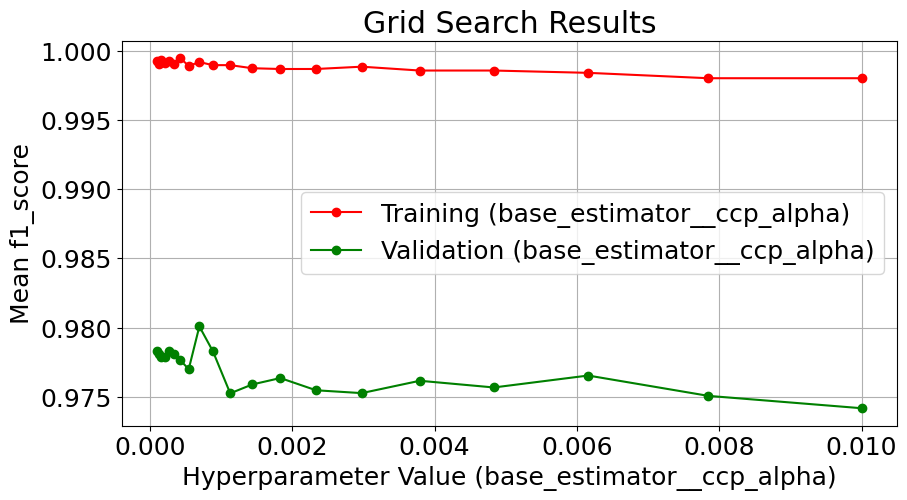

In [52]:
# hyperparam search on n_estimators
from util.utils import perform_grid_search

param_grid = {'base_estimator__cc': np.arange(1, 20)}

base_estimator = DecisionTreeClassifier(random_state=RANDOM_SEED, max_depth=5, criterion='entropy' )
base_model = AdaBoostClassifier(random_state=RANDOM_SEED, estimator=base_estimator, n_estimators=350)
best_base_model = perform_grid_search(base_model, X_train_scaled, y_train, param_grid, scoring=scorer, cv=5, dataset_name='digits', verbose=10)

We find the same max_depth as for the decision tree beyond which the model overfits.
But strangely, after this optimal max_depth, the cross-validation score decreases significantly.
Maybe correlate this to the fact that weak learners are not supposed to overfit.

In [45]:
best_base_model.base_estimator_.max_depth

/home/romain/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


9

In [49]:
# cross val score on best model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_base_model, X_train_scaled, y_train, cv=5, scoring=scorer)
print(scores.mean(), scores.std())

0.9846659500707103 0.0051146551769980925


In [43]:
best_base_model.fit(X_train_scaled, y_train)
y_pred = best_base_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# f1 score on the test set
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       111
           1       0.99      1.00      1.00       114
           2       1.00      0.99      1.00       111
           3       0.99      0.99      0.99       114
           4       0.98      0.99      0.99       114
           5       0.98      0.96      0.97       112
           6       0.99      0.99      0.99       112
           7       0.97      0.99      0.98       113
           8       0.97      0.99      0.98       111
           9       0.96      0.96      0.96       112

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



0.9848626110989378

# 4. kNN

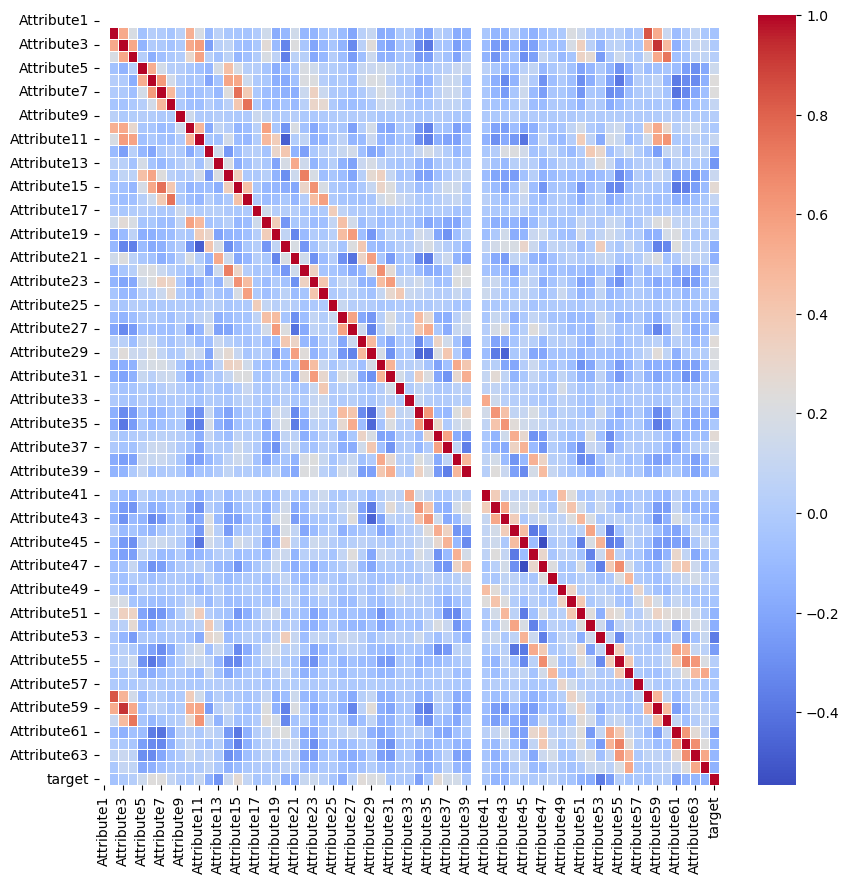

In [4]:
# plot correlation matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.show()

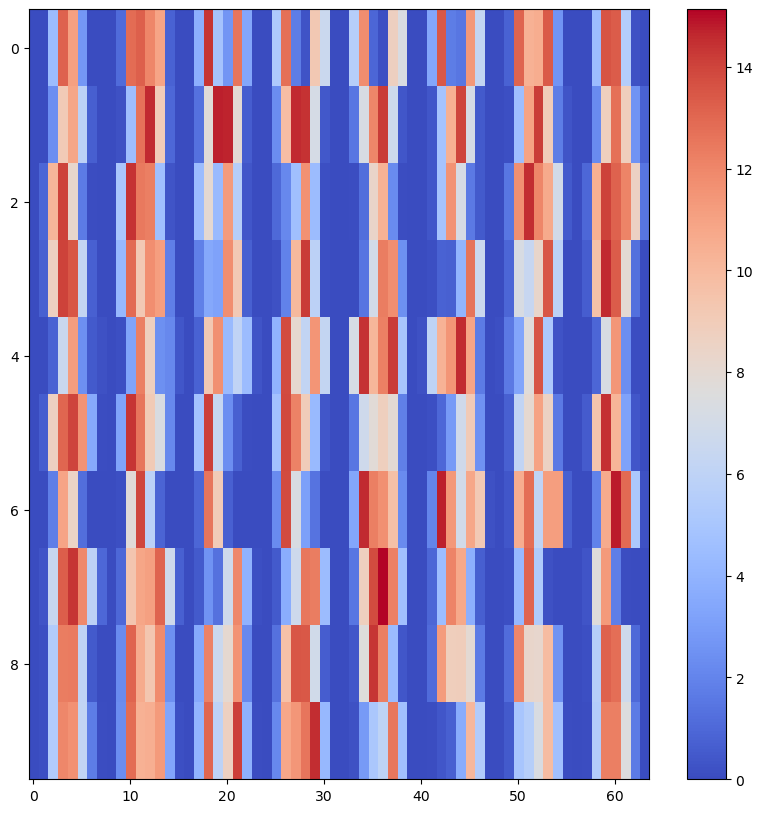

In [6]:
# can you plot for each class, for each attribute the standard deviation of the attribute value
# the plot should be a matrix of size n_classes x n_attributes 
# where each cell (i, j) is the standard deviation of the attribute j for class i

# get the standard deviation of each attribute for each class
means = df.groupby('target').mean()
means

# plot the stds
plt.figure(figsize=(10, 10))

# plot as a matrix of size n_classes x n_attributes
plt.imshow(means.values, cmap='coolwarm', aspect='auto')
plt.colorbar()

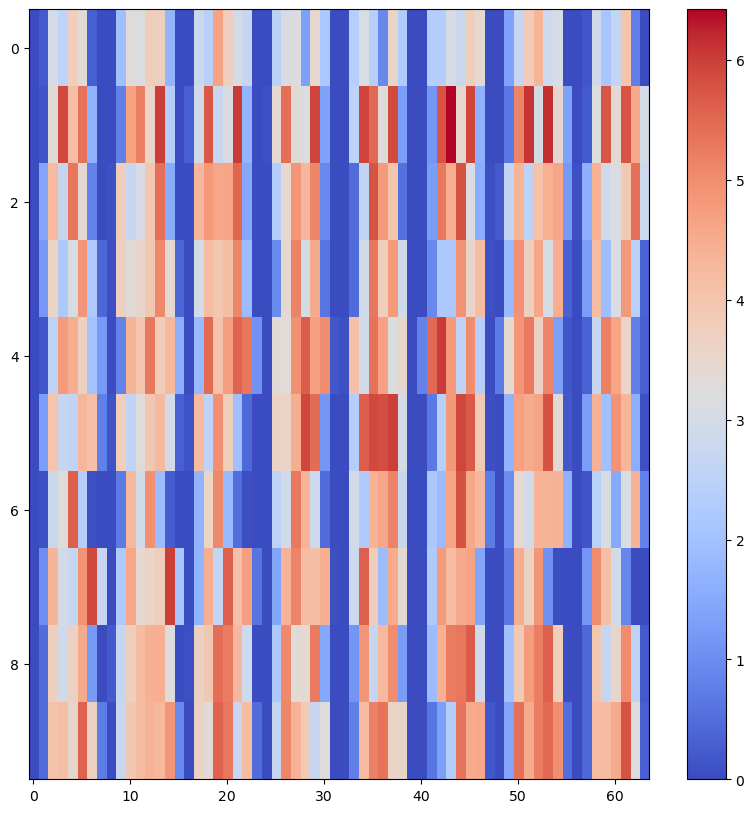

In [5]:
# can you plot for each class, for each attribute the standard deviation of the attribute value
# the plot should be a matrix of size n_classes x n_attributes 
# where each cell (i, j) is the standard deviation of the attribute j for class i

# get the standard deviation of each attribute for each class
stds = df.groupby('target').std()
stds

# plot the stds
plt.figure(figsize=(10, 10))

# plot as a matrix of size n_classes x n_attributes
plt.imshow(stds.values, cmap='coolwarm', aspect='auto')
plt.colorbar()

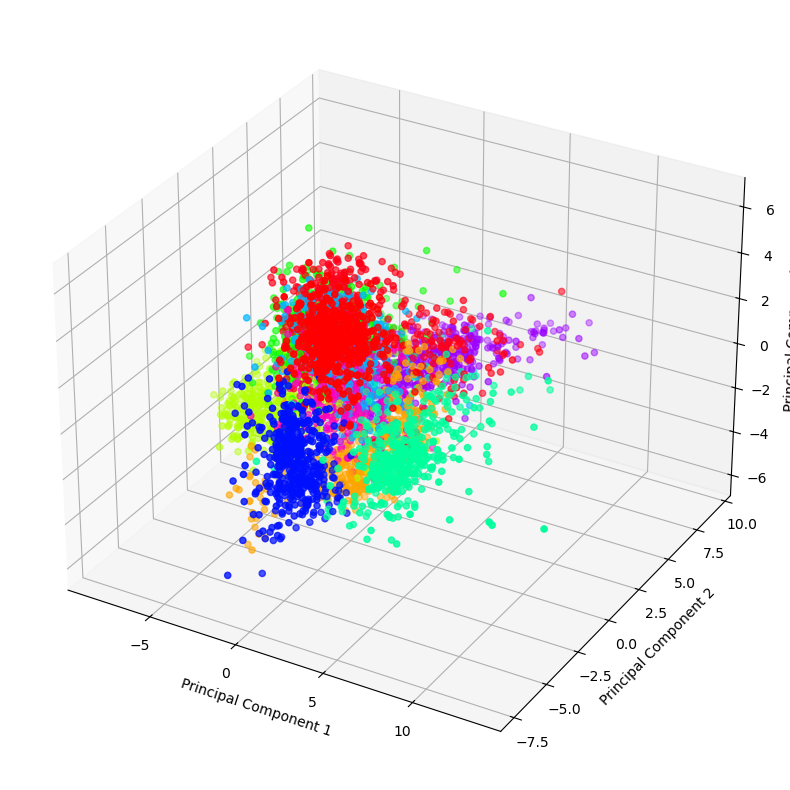

In [16]:
# 3d pca plot
from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# X_train_pca = pca.fit_transform(X_train_scaled)

# plt.figure(figsize=(10, 10))
# sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='hls')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

# 3d pca plot
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='hsv')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.savefig('figures/digits_pca_3d.png')
plt.show()

## 4.1 Learning curve

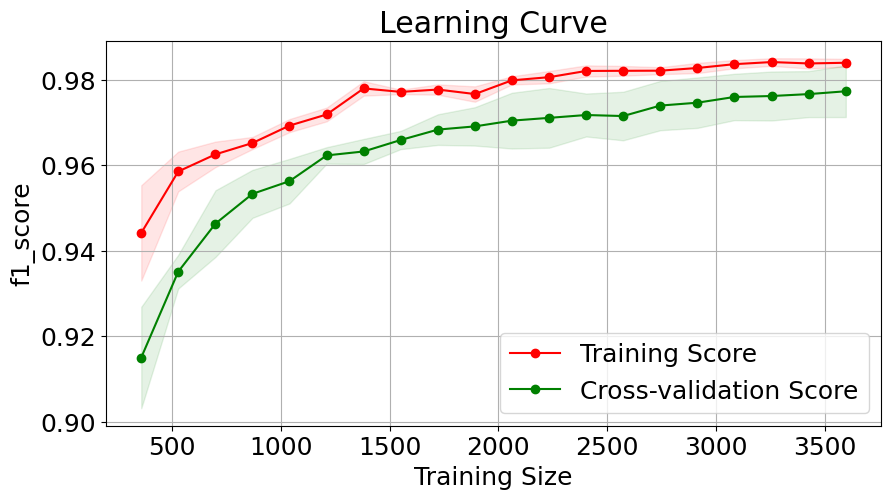

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from util.utils import learning_curve_with_cross_validation
from sklearn.model_selection import cross_val_score

base_model = KNeighborsClassifier()
scorer = make_scorer(f1_score, average='weighted')
train_sizes = np.linspace(0.1, 1.0, 20)
learning_curve_with_cross_validation(base_model, X_train_scaled.values, y_train, train_sizes, cv=5, scoring=scorer, dataset_name='digits')

In [5]:
cross_val_score(base_model, X_train_scaled.values, y_train, cv=5, scoring=scorer).mean()

0.9772635819978218

In [22]:
# knn classifier
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, average='weighted')

base_model = KNeighborsClassifier()
start = time.time()
base_model.fit(X_train_scaled, y_train)
end = time.time()
print(f"Training time: {(end - start) * 1000} ms")

print(cross_val_score(base_model, X_train_scaled.values, y_train, cv=5, scoring=scorer).mean())
start = time.time()
y_pred = base_model.predict(X_test_scaled.values)
end = time.time()
print(f"Inference time: {(end - start) * 1000} ms")
print(classification_report(y_test, y_pred))
f1_score(y_test, y_pred, average='weighted')

Training time: 3.4530162811279297 ms
0.9772635819978218
Inference time: 42.00148582458496 ms
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       0.98      1.00      0.99       114
           2       1.00      1.00      1.00       111
           3       0.98      0.96      0.97       114
           4       0.98      0.99      0.99       114
           5       0.96      0.96      0.96       112
           6       0.99      1.00      1.00       112
           7       0.95      0.96      0.96       113
           8       0.97      0.94      0.95       111
           9       0.96      0.96      0.96       112

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



0.9777073273576753

## 4.2 Hyperparamater tuning

[0.97662574 0.97817195 0.97726358 0.97528105 0.97419836 0.97375971
 0.97200296 0.97132199 0.96955733 0.9680102  0.96756081 0.96688741
 0.96488018 0.96418751 0.96110134 0.95998915 0.95932233 0.9586887
 0.95755422 0.95665085 0.95399074 0.95445692 0.95337232 0.95072792
 0.94981121]


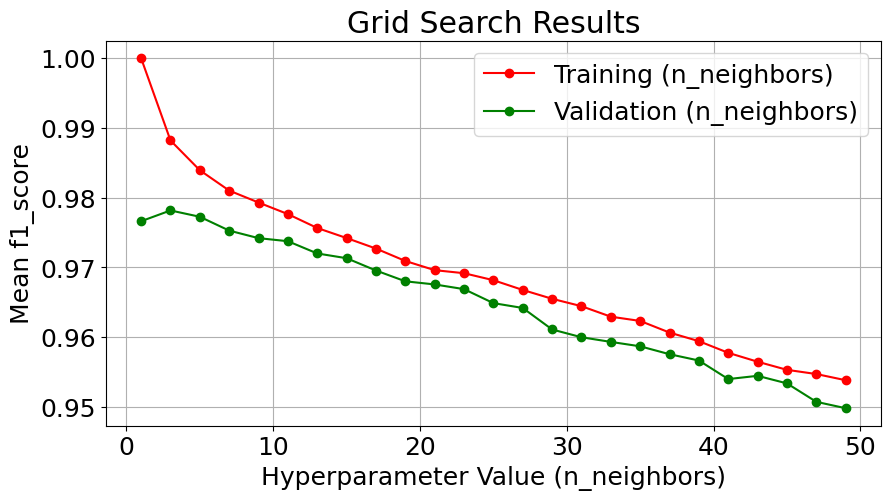

3
0.9781719500683256


In [36]:
# perform grid search on n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50, 2)}
knn_model = KNeighborsClassifier()
best_knn_model = perform_grid_search(knn_model, X_train_scaled.values, y_train, param_grid, scoring=scorer, cv=5, show_plot=True)
print(best_knn_model.n_neighbors)
print(cross_val_score(best_knn_model, X_train_scaled.values, y_train, cv=5, scoring=scorer).mean()) 

[0.97462603 0.97364456 0.97415243 0.97194154 0.97062059 0.96840233
 0.96615848 0.96531744 0.96554243 0.96325081 0.96371953 0.96259126
 0.96215625 0.95993698 0.95904578 0.95738983 0.95509386 0.95421565
 0.95327825 0.95310391 0.95218995 0.95133229 0.9503953  0.94879444
 0.94926802]


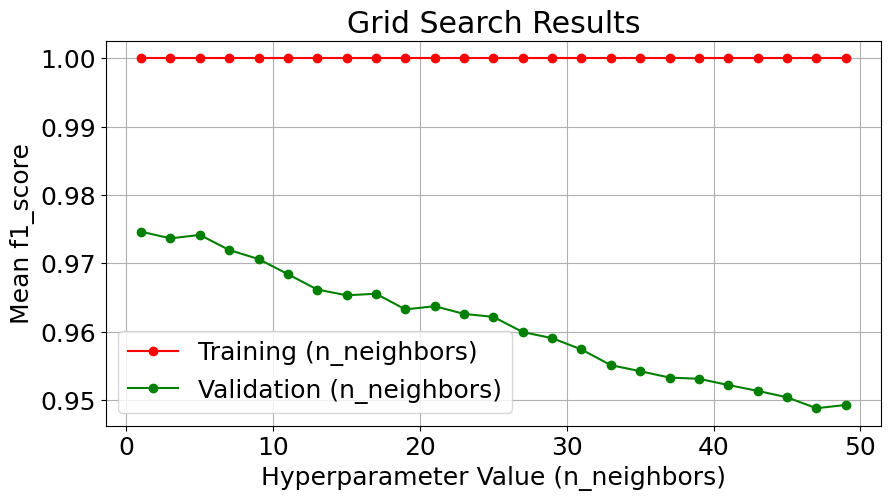

1
0.9746260344567743


In [32]:
# perform grid search on n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50)}
knn_model = KNeighborsClassifier(weights='distance')
best_knn_model = perform_grid_search(knn_model, X_train_scaled.values, y_train, param_grid, scoring=scorer, cv=5, show_plot=True)
print(best_knn_model.n_neighbors)
print(cross_val_score(best_knn_model, X_train_scaled.values, y_train, cv=5, scoring=scorer).mean())

[0.97817195 0.98018044 0.97074809 0.87130117]


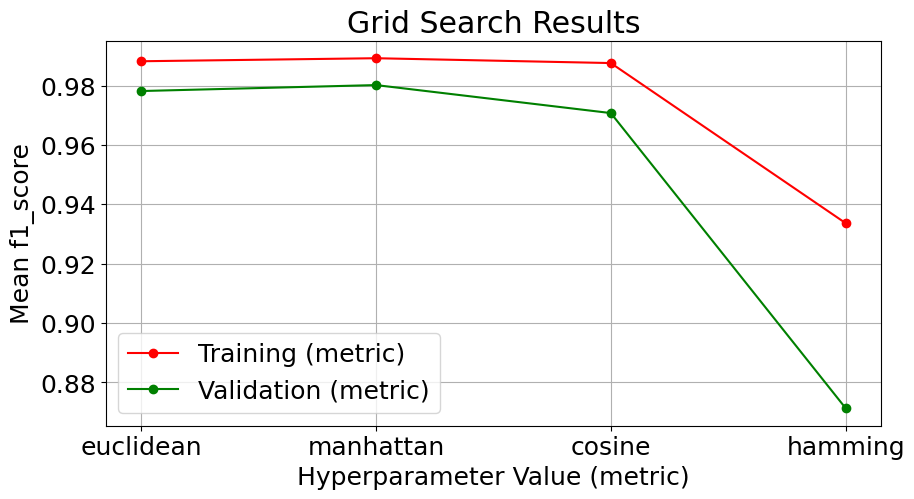

manhattan
0.9801804420867611


In [29]:
# test different distance metrics
param_grid = {'metric': ['euclidean', 'manhattan', 'cosine', 'hamming']}
knn_model = KNeighborsClassifier(n_neighbors=3, weights='uniform')
best_knn_model = perform_grid_search(knn_model, X_train_scaled.values, y_train, param_grid, scoring=scorer, cv=5, show_plot=True)

print(best_knn_model.metric)
print(cross_val_score(best_knn_model, X_train_scaled.values, y_train, cv=5, scoring=scorer).mean())

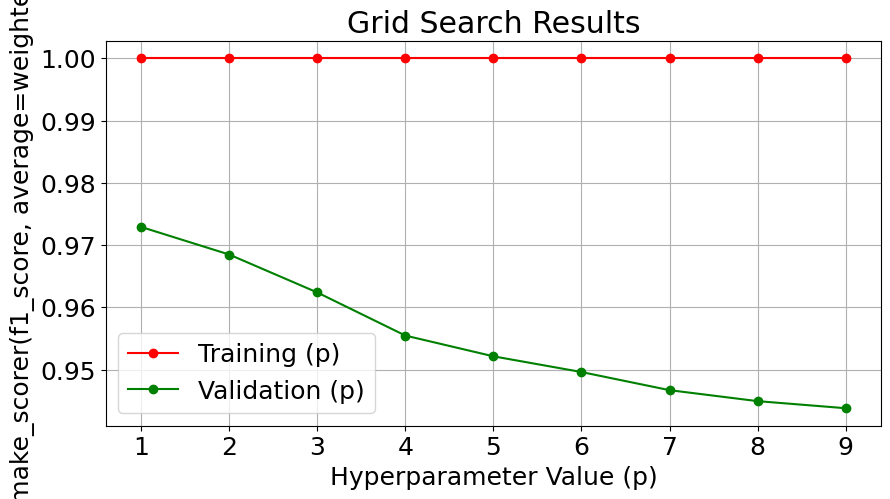

20


In [37]:
# perform grid search on n_neighbors
param_grid = {'p': np.arange(1, 10)}
knn_model = KNeighborsClassifier(weights='distance', n_neighbors=20)
best_knn_model = perform_grid_search(knn_model, X_train_scaled.values, y_train, param_grid, scoring=scorer, cv=5, show_plot=True)
print(best_knn_model.n_neighbors)

In [45]:
# test on test set
clf = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')
clf.fit(X_train_scaled.values, y_train)
y_pred = clf.predict(X_test_scaled.values)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       0.98      0.99      0.99       114
           2       0.99      0.99      0.99       111
           3       0.98      0.96      0.97       114
           4       0.98      0.97      0.98       114
           5       0.96      0.96      0.96       112
           6       0.99      1.00      1.00       112
           7       0.95      0.96      0.96       113
           8       0.97      0.95      0.96       111
           9       0.95      0.96      0.95       112

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124

0.9750870736744557


# 5. SVM

### 5.1 Learning curve

In [23]:
# fist train a basic svm
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score
scorer = make_scorer(f1_score, average='weighted')

svm_model = SVC(random_state=RANDOM_SEED)
train_sizes = np.linspace(0.1, 1.0, 20)
learning_curve_with_cross_validation(svm_model, X_train, y_train, train_sizes, cv=5, scoring=scorer, dataset_name='digits')
cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring=scorer).mean()

### 5.2 Hyperparameter Tuning

[0.97887326 0.97820113 0.98510975 0.93462238]


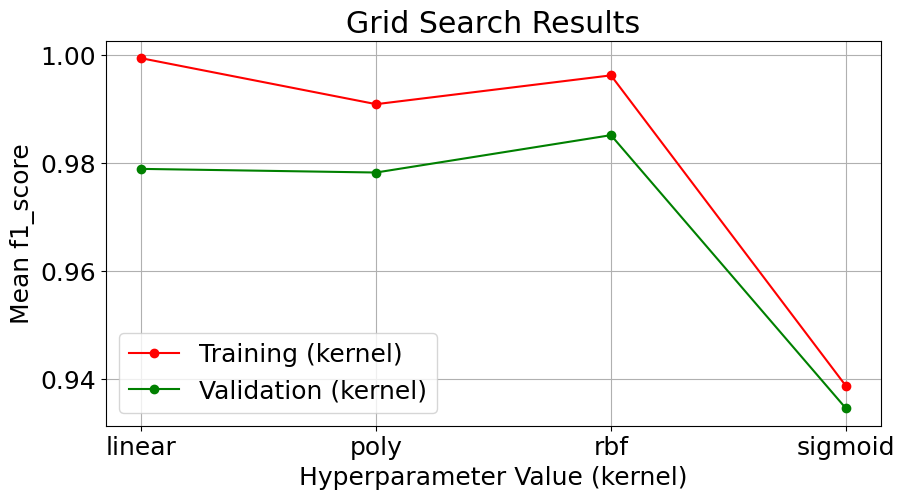

Training time: 158.5075855255127 ms
Inference time: 79.98776435852051 ms


0.9866676849594416

In [24]:
# Let's find the best kernel for SVM
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
scorer = make_scorer(f1_score, average='weighted')
svm_model = SVC(random_state=RANDOM_SEED, max_iter=-1)
best_svm_model = perform_grid_search(svm_model, X_train_scaled, y_train, param_grid, scoring=scorer, cv=5, show_plot=True)
start = time.time()
best_svm_model.fit(X_train_scaled, y_train)
end = time.time()
print(f"Training time: {(end - start) * 1000} ms")
start = time.time()
y_pred = best_svm_model.predict(X_test_scaled)
end = time.time()
print(f"Inference time: {(end - start) * 1000} ms")
f1_score(y_test, y_pred, average='weighted')

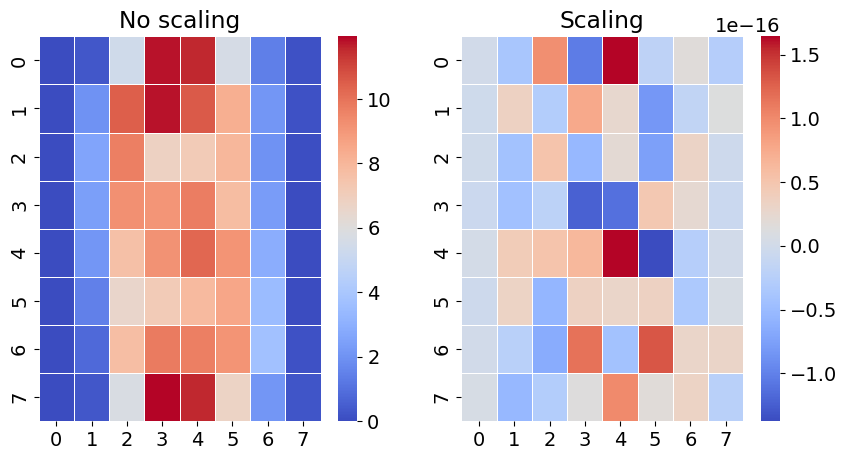

In [11]:
# plot x_train_scaled mean value per attribute and plot it as a matrix
# plt.figure(figsize=(10, 10))
# sns.heatmap(X_train.mean().values.reshape(8, 8), annot=False, cmap='coolwarm', linewidths=0.5)
# plt.show()

# Make a subplot 1x2 and plot the mean of X_train and X_train_scaled
# font size
plt.rc('font', size=14)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(X_train.mean().values.reshape(8, 8), annot=False, cmap='coolwarm', linewidths=0.5, ax=axes[0])
sns.heatmap(X_train_scaled.mean().values.reshape(8, 8), annot=False, cmap='coolwarm', linewidths=0.5, ax=axes[1])
axes[0].set_title('No scaling')
axes[1].set_title('Scaling')
plt.savefig('figures/digits_mean_values_scaling.png')
plt.show()


[0.97887326 0.97820113 0.98510975]


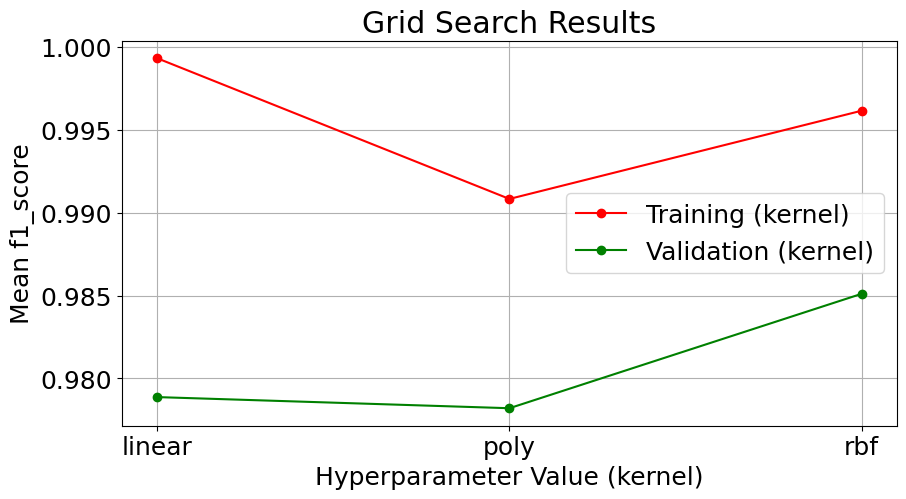

0.9888854033767462

In [18]:
# Let's find the best kernel for SVM
param_grid = {'kernel': ['linear', 'poly', 'rbf']}
scorer = make_scorer(f1_score, average='weighted')
svm_model = SVC(random_state=RANDOM_SEED, max_iter=-1)
best_svm_model = perform_grid_search(svm_model, X_train_scaled, y_train, param_grid, scoring=scorer, cv=5, show_plot=True, dataset_name='digits')
cross_val_score(best_svm_model, X_train, y_train, cv=5, scoring=scorer).mean()
# best_svm_model.fit(X_train, y_train)
# y_pred = best_svm_model.predict(X_test)
# f1_score(y_test, y_pred, average='weighted')

[0.97888739 0.98843951 0.98999599 0.98999163 0.98932198 0.98774776
 0.98640729 0.98440466 0.98285345]


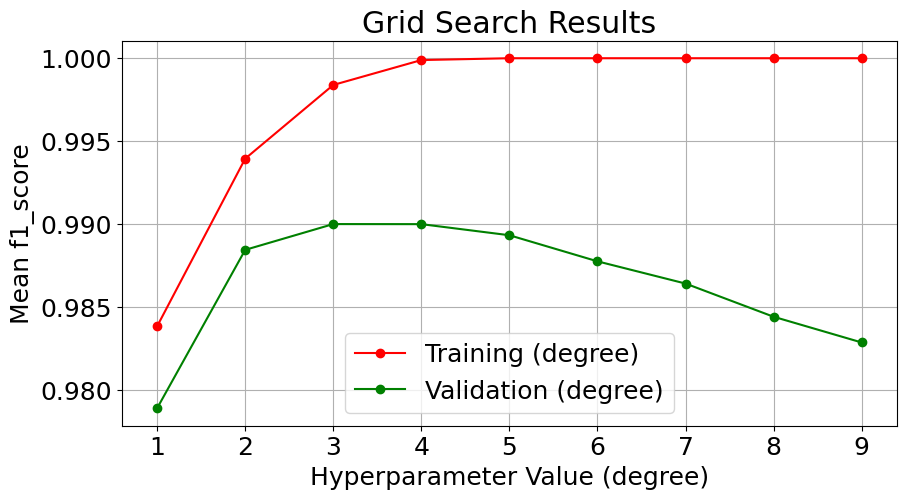

0.9899959868623526

In [21]:
# Let's find the best kernel for SVM
param_grid = {'degree': np.arange(1, 10)}
svm_model = SVC(random_state=RANDOM_SEED, max_iter=-1, kernel='poly')
best_svm_model = perform_grid_search(svm_model, X_train, y_train, param_grid, scoring=scorer, cv=5, show_plot=True)
cross_val_score(best_svm_model, X_train, y_train, cv=5, scoring=scorer).mean()

[0.98380374 0.9835759  0.98533961 0.98622496 0.98667376 0.98667473
 0.98733303 0.98866218 0.98933324 0.98999599 0.9888948  0.98845434
 0.98911245 0.98978228 0.99000019 0.98999998 0.98999998 0.98999998
 0.98999998 0.98999998]


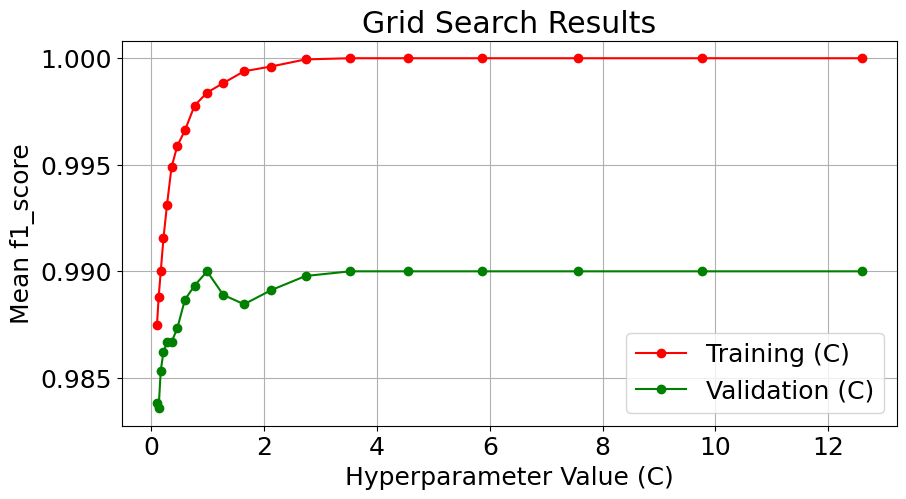

0.9900001892326186

In [39]:
# Let's find the best kernel for SVM
param_grid = {'C': np.logspace(-1, 1.1, 20)}
svm_model = SVC(random_state=RANDOM_SEED, max_iter=-1, kernel='poly')
best_svm_model = perform_grid_search(svm_model, X_train, y_train, param_grid, scoring=scorer, cv=5, show_plot=True)
cross_val_score(best_svm_model, X_train, y_train, cv=5, scoring=scorer).mean()

In [41]:
best_svm_model.C

3.526699214174661

In [40]:
best_svm_model.fit(X_train, y_train)
y_pred = best_svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
f1_score(y_test, y_pred, average='weighted')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       111
           1       0.99      1.00      1.00       114
           2       1.00      0.99      1.00       111
           3       0.97      1.00      0.99       114
           4       0.99      1.00      1.00       114
           5       0.98      0.99      0.99       112
           6       0.99      0.99      0.99       112
           7       1.00      0.99      1.00       113
           8       0.98      0.98      0.98       111
           9       0.99      0.96      0.98       112

    accuracy                           0.99      1124
   macro avg       0.99      0.99      0.99      1124
weighted avg       0.99      0.99      0.99      1124



0.9902044753004364